**Importing the necessary packages and libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Necessary packages
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/churn/Churn_Modelling.csv')

**Displaying the first 5 rows from the dataset**

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Preprocessing**




Removing the **unnecessary columns** and splitting the target attribute for training.

In [ ]:
features = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
target  = dataset['Exited']

Displaying the features in the dataset after removing **unnecessary attributes**.

In [ ]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
features = pd.get_dummies(features, prefix=['geo'],columns=['Geography'])
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


**Labelling the Gender value as 0 and 1.**



In [ ]:
label1 = LabelEncoder()
features['Gender'] = label1.fit_transform(features['Gender'])

In [ ]:
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Splitting the dataset for training and testing.**


In [ ]:
train,test,trainlabel,testlabel = train_test_split(features, target, test_size = 0.2, random_state = 1)

**Displaying the no of samples in training and testing.**

In [ ]:
print("Training samples:" , train.shape[0])
print("Testing samples:" ,test.shape[0])
print("Training sample size:",train.shape)
print("Testing sample size:",test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 12)
Testing sample size: (2000, 12)


**Feature scaling**


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)# Scaling fitted only to training set to avoid information leakage.
test = sc.transform(test)

# **Building the ANN model**

In [ ]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,trainlabel,batch_size=20,epochs = 100) #model run for 100 epochs

Epoch 1/100
400/400 [==============================] - 4s 2ms/step - loss: 0.5664 - accuracy: 0.7715
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4092 - accuracy: 0.8290
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8303
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8377
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.8557
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8641
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8618
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8623
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8593
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3376 - accura

**Predicting the Testing set results**

In [ ]:
loss,acc = model.evaluate(test,testlabel)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

63/63 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8595
Accuarcy: 0.859499990940094
Loss: 0.3563094437122345


**Saving and loading the model**


In [ ]:
model.save("/content/drive/MyDrive/churn/model_pd_85.h5")

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/churn/model_pd_85.h5")
trainloss , trainaccuracy = model.evaluate(train,trainlabel)
testloss, testaccuracy = model.evaluate(test,testlabel)
print('Train loss:', trainloss)
print('Train accuracy:', 100*trainaccuracy)
print('Test loss:', testloss)
print('Test accuracy:', 100*testaccuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8595
Train loss: 0.3009149134159088
Train accuracy: 87.4750018119812
Test loss: 0.3563094437122345
Test accuracy: 85.9499990940094


Text(69.0, 0.5, 'Expected')

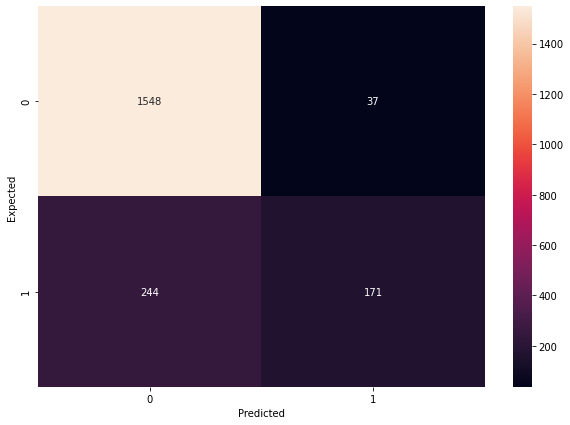

In [ ]:
y_predicted = model.predict(test)
y_predicted_labels = y_predicted > 0.5
cm = tf.math.confusion_matrix(labels=testlabel,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [ ]:
#PRECISION
precision_0 = round(1548 / (1548+244),2)
precision_1 = round(171 / (171+37),2)

print("Precision for customers who did not leave the bank:",precision_0)
print("Precision for customers who left the bank:",precision_1)

Precision for customers who did not leave the bank: 0.86
Precision for customers who left the bank: 0.82


In [ ]:
#RECALL
recall_0 = round(1548 / (1548+37),2)
recall_1 = round(171 / (171+244),2)

print("Recall for customers who did not leave the bank:",recall_0)
print("Recall for customers who left the bank:",recall_1)

Recall for customers who did not leave the bank: 0.98
Recall for customers who left the bank: 0.41


In [ ]:
#F1 SCORE
f1_score_0 = round(2 * ((precision_0 * recall_0) / (precision_0 + recall_0)),2)
f1_score_1 = round(2 * ((precision_1 * recall_1) / (precision_1 + recall_1)),2)

print("F1 score for customers who did not leave the bank:",f1_score_0)
print("F1 score for customers who left the bank:",f1_score_1)

F1 score for customers who did not leave the bank: 0.92
F1 score for customers who left the bank: 0.55


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testlabel,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1585
           1       0.82      0.41      0.55       415

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



# **Analysing the impact of each feature on the target attribute**

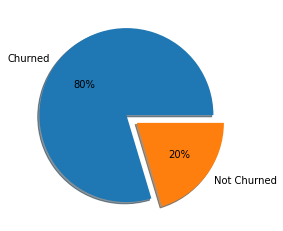

In [ ]:
import matplotlib.pyplot as plt

output = dataset['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

**Impact of Gender on Churned Data**

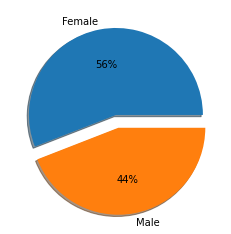

Female    1139
Male       898
Name: Gender, dtype: int64

In [ ]:
df_cond = dataset['Exited'].values==1
df_churned = dataset[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_count

**Impact of geographical data on churned data**

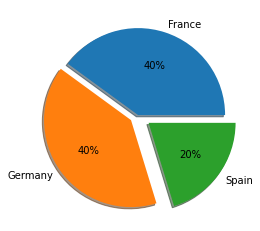

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [ ]:
geo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

**Impact of Number Of products the customer has availed in the bank on churned and Non-churned data**


In [ ]:
df_cond = dataset['Exited'].values==0
df_notchurned = dataset[df_cond]

df_notchurned['NumOfProducts'].value_counts() #count for each value of NumOfProducts of non-churned customer

2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64

In [ ]:
df_churned['NumOfProducts'].value_counts()  #count for each value of NumOfProducts of churned customer

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

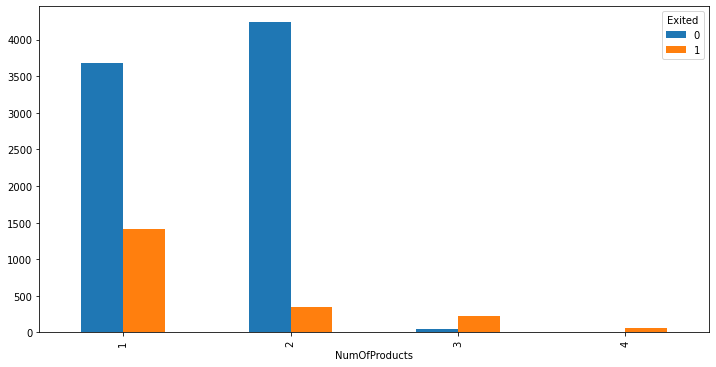

In [ ]:
dataset.groupby('Exited')['NumOfProducts'].value_counts().unstack('Exited').plot.bar(figsize=(12,6))

**Analysing the impact of CreditScore, IsActiveMember, HasCrCard and Tenure attributes against the target attribute(Exited) through Bar plots**



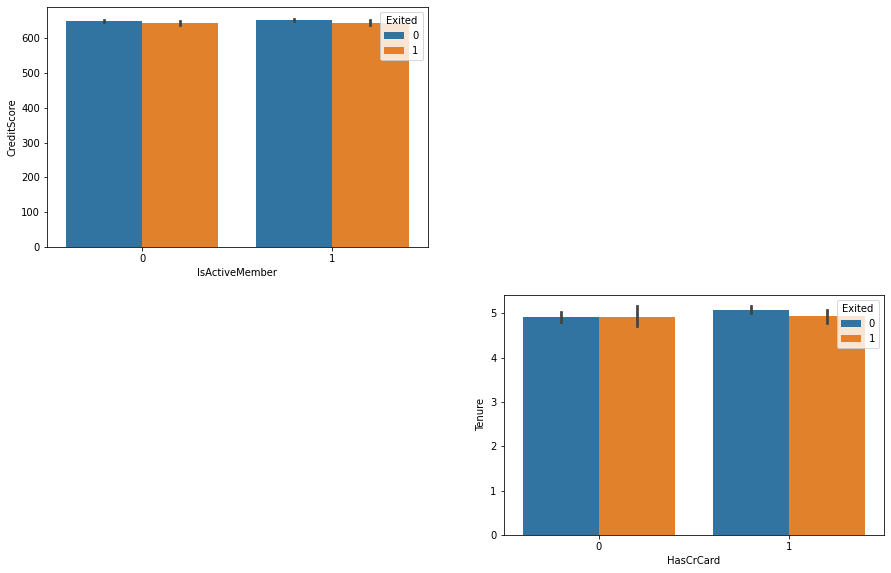

In [ ]:
# Analaysing the effect of being an active member and having credit card and whether or not they have exited.

plt.figure(figsize = (15,15))

# Plots the bar chart for IsActiveMember(x-axis) with CreditScore(y-axis) and categorises IsActiveMember further as people who Exited vs Not Exited.
plt.subplot(3,2,1)
_= sn.barplot(x='IsActiveMember',y = 'CreditScore', hue = 'Exited',data = dataset)

# Plots the bar chart for HasCrCard(x-axis) with Tenure(y-axis) and categorises HasCrCard further as people who Exited vs Not Exited.
plt.subplot(3,2,4)
_= sn.barplot(x='HasCrCard',y = 'Tenure',hue = 'Exited',data = dataset)

**Analysing the impact of Balance, Gender and Age attributes against the target attribute(Exited) through Bar plots**

Minimum Age : 18
Maximum Age : 92


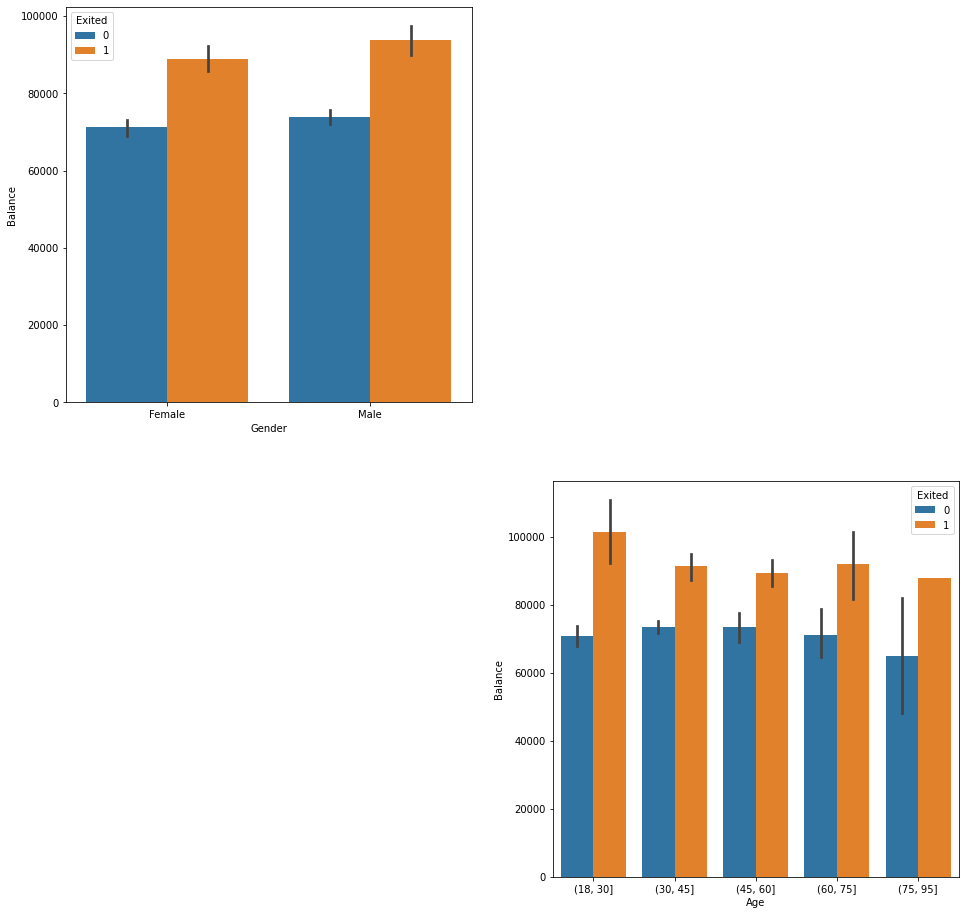

In [ ]:
# we need to know the min and max value of Age attribute inorder to stratify it
print("Minimum Age : " + str(min(dataset['Age'])))
print("Maximum Age : " + str(max(dataset['Age'])))

# Creating a temporary DataFrame
tempDf = pd.DataFrame()

# pd.cut() categorizes each Age value to fit in the specified cut range. Age is generalised to specific ranges for the purpose of plotting and analysing
tempDf['Age'] = pd.cut(dataset.Age, [18,30,45,60,75,95])
tempDf['Exited'] = dataset['Exited']
tempDf['Gender'] = dataset['Gender']
tempDf['Balance'] = dataset['Balance']

plt.figure(figsize = (16,16))

# Plots the bar chart for Gender(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
plt.subplot(2,2,1)
_= sn.barplot(x='Gender',y = 'Balance', hue = 'Exited', data = tempDf)

# Plots the bar chart for Age(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
plt.subplot(2,2,4)
_= sn.barplot(x = 'Age', y = 'Balance', hue = 'Exited', data = tempDf)


**Analysing the Correlation among attributes by using a heatmap**

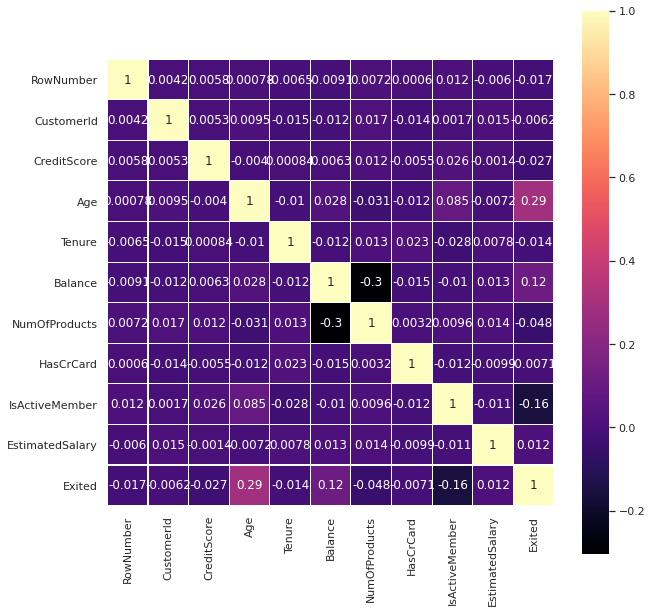

In [ ]:
plt.figure(figsize=(10, 10))
sn.set(style = 'white')
sn.heatmap(dataset.select_dtypes(include='number').corr(), annot = True, cmap = 'magma', square = True, linewidths=0.1);

#**After analysing ,Testing the unknown sample**

In [ ]:
result = model.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]]))
print(result)
if result>0.5:
   print("Customer will leave the bank in the future")
else:
   print("Customer will not leave the bank in the future")

[[0.01377169]]
Customer will not leave the bank in the future


Geography: Germany

Credit Score: 550

Gender: Female

Age: 30 years old

Tenure: 2 years

Balance: $80000

Number of Products: 4

Does this customer have a credit card? Yes

Is this customer an Active Member: No

Estimated Salary: $70000

In [ ]:
result = model.predict(sc.transform([[550, 0, 30, 2, 80000, 4, 1, 0, 70000, 0, 1, 0]]))
print(result)
if result>0.5:
   print("Customer will leave the bank in the future")
else:
   print("Customer will not leave the bank in the future")

[[0.9960829]]
Customer will leave the bank in the future
